In [116]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [117]:
df=pd.read_csv('C:\\nagender\\Georgia tech data science and data analytics\\Project3\\retail-prices.csv')

In [118]:
df.shape

(14, 30)

In [119]:
#get dummies
df = pd.get_dummies(df)

In [120]:
# scale features using min-max scaler - chose min-max scaler because of very small standard deviations for numerical data and majority appeared normally distributed
for col in df.columns:
    df[col] = (df[col]-min(df[col]))/ (max(df[col]) - min(df[col]))

In [121]:
df.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,retail_prices_ France,retail_prices_ Germany,retail_prices_ Italy,retail_prices_ Netherlands,retail_prices_ Portugal,retail_prices_ Spain,retail_prices_ Sweden,retail_prices_Japan,retail_prices_Norway,retail_prices_United Kingdom
0,0.268135,0.201965,0.259942,0.239905,0.177380,0.106201,0.183028,0.132619,0.094146,0.057165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.008734,0.054316,0.052257,0.063466,0.040627,0.075707,0.105437,0.144778,0.144088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.126943,0.103712,0.143550,0.121932,0.166802,0.133999,0.132280,0.181219,0.169304,0.108066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.019430,0.000000,0.014549,0.000000,0.026851,0.019957,0.000000,0.060956,0.050633,0.003915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.116580,0.077511,0.000000,0.007126,0.000000,0.000000,0.006656,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,retail_prices_ France,retail_prices_ Germany,retail_prices_ Italy,retail_prices_ Netherlands,retail_prices_ Portugal,retail_prices_ Spain,retail_prices_ Sweden,retail_prices_Japan,retail_prices_Norway,retail_prices_United Kingdom
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.242876,0.218575,0.238742,0.192569,0.209985,0.190154,0.214464,0.237291,0.224740,0.207685,...,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429
std,0.325478,0.310267,0.291632,0.267564,0.288681,0.293503,0.309454,0.316590,0.303141,0.324702,...,0.267261,0.267261,0.267261,0.267261,0.267261,0.267261,0.267261,0.267261,0.267261,0.267261
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.066062,0.051583,0.077837,0.053246,0.065094,0.044013,0.057820,0.082372,0.074960,0.054229,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.121762,0.094432,0.129486,0.095012,0.128967,0.088738,0.079451,0.121087,0.114320,0.071652,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.242876,0.193777,0.258972,0.203484,0.174736,0.140948,0.214226,0.186161,0.168513,0.159358,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


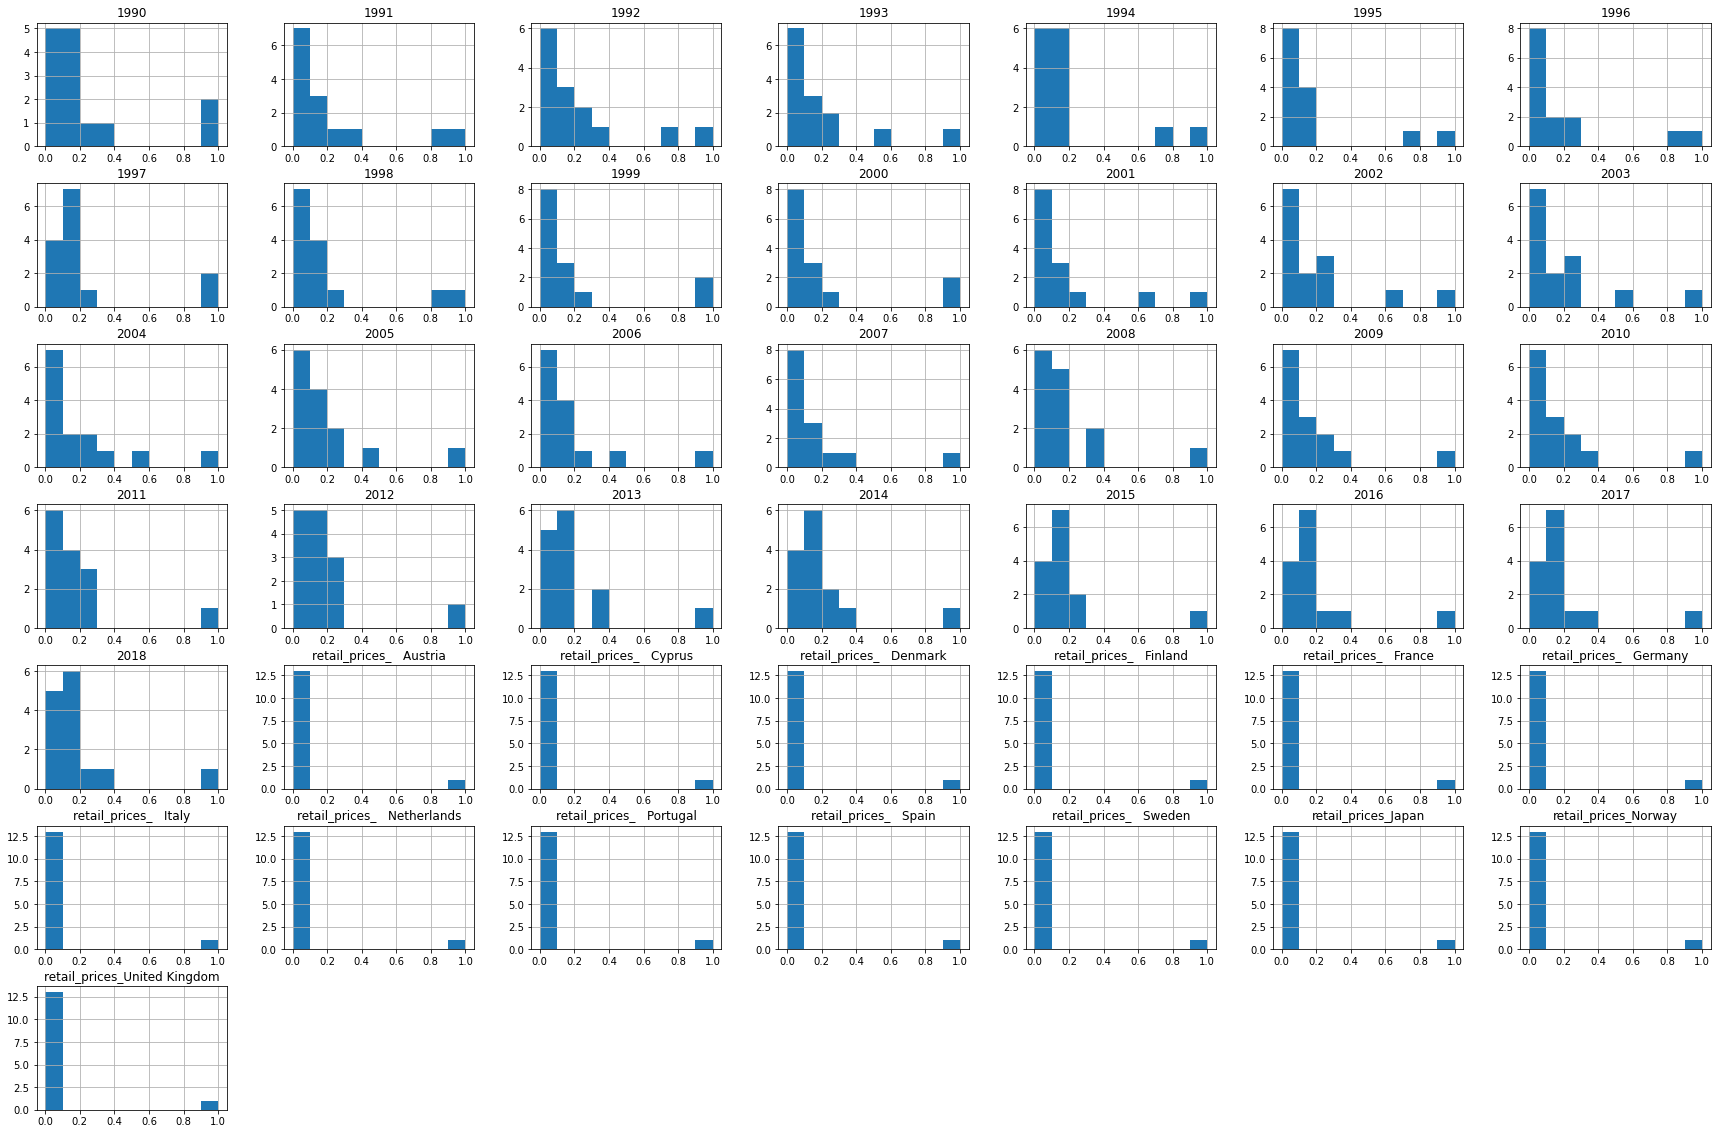

In [123]:
df.hist(figsize=(30,20));

In [124]:
df.columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', 'retail_prices_   Austria', 'retail_prices_   Cyprus',
       'retail_prices_   Denmark', 'retail_prices_   Finland',
       'retail_prices_   France', 'retail_prices_   Germany',
       'retail_prices_   Italy', 'retail_prices_   Netherlands',
       'retail_prices_   Portugal', 'retail_prices_   Spain',
       'retail_prices_   Sweden', 'retail_prices_Japan',
       'retail_prices_Norway', 'retail_prices_United Kingdom'],
      dtype='object')

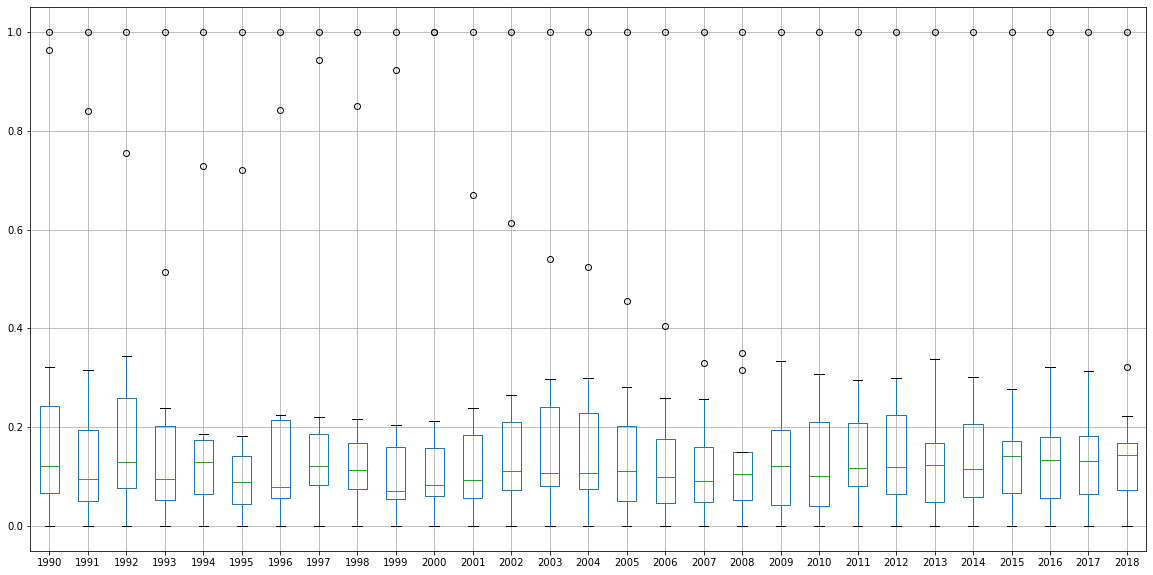

In [125]:
box_x = df[['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018']]
box_x.boxplot(figsize=(20,10))

In [126]:
df.corr()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,retail_prices_ France,retail_prices_ Germany,retail_prices_ Italy,retail_prices_ Netherlands,retail_prices_ Portugal,retail_prices_ Spain,retail_prices_ Sweden,retail_prices_Japan,retail_prices_Norway,retail_prices_United Kingdom
1990,1.000000,0.990732,0.969466,0.915742,0.960417,0.957121,0.978779,0.974627,0.965262,0.966271,...,-0.111683,-0.081901,0.069301,-0.191865,-0.067010,-0.124283,-0.146047,0.636306,-0.159792,0.669524
1991,0.990732,1.000000,0.989229,0.955993,0.980464,0.979155,0.990362,0.970796,0.955430,0.975132,...,-0.130858,-0.089336,0.090928,-0.179469,-0.045789,-0.123769,-0.145036,0.724891,-0.158201,0.576021
1992,0.969466,0.989229,1.000000,0.975448,0.981742,0.977561,0.987816,0.955354,0.934966,0.961999,...,-0.235621,-0.073845,0.104204,-0.157126,0.017094,-0.121708,-0.159041,0.751306,-0.158083,0.509122
1993,0.915742,0.955993,0.975448,1.000000,0.975261,0.970138,0.959010,0.903481,0.871524,0.925177,...,-0.199481,-0.064060,0.018555,-0.133900,-0.008700,-0.134752,-0.146676,0.868556,-0.162858,0.346461
1994,0.960417,0.980464,0.981742,0.975261,1.000000,0.995697,0.988932,0.971381,0.951944,0.977662,...,-0.209359,-0.064957,-0.024395,-0.139592,-0.048733,-0.180154,-0.096596,0.787659,-0.137158,0.517515
1995,0.957121,0.979155,0.977561,0.970138,0.995697,1.000000,0.991083,0.972571,0.953623,0.982518,...,-0.186472,-0.093510,-0.045981,-0.162707,-0.008238,-0.133351,-0.105393,0.794164,-0.127060,0.519474
1996,0.978779,0.990362,0.987816,0.959010,0.988932,0.991083,1.000000,0.983899,0.970145,0.988900,...,-0.193280,-0.125961,0.009451,-0.166198,0.009451,-0.125187,-0.142211,0.730619,-0.146853,0.584373
1997,0.974627,0.970796,0.955354,0.903481,0.971381,0.972571,0.983899,1.000000,0.996530,0.992290,...,-0.215727,-0.120621,-0.014282,-0.147580,-0.044986,-0.155069,-0.096657,0.642475,-0.114630,0.693398
1998,0.965262,0.955430,0.934966,0.871524,0.951944,0.953623,0.970145,0.996530,1.000000,0.987727,...,-0.213381,-0.118736,-0.006814,-0.146529,-0.055639,-0.150284,-0.090943,0.593358,-0.129252,0.736077
1999,0.966271,0.975132,0.961999,0.925177,0.977662,0.982518,0.988900,0.992290,0.987727,1.000000,...,-0.184095,-0.123705,-0.002925,-0.145223,-0.038326,-0.136894,-0.117458,0.702317,-0.128564,0.633597


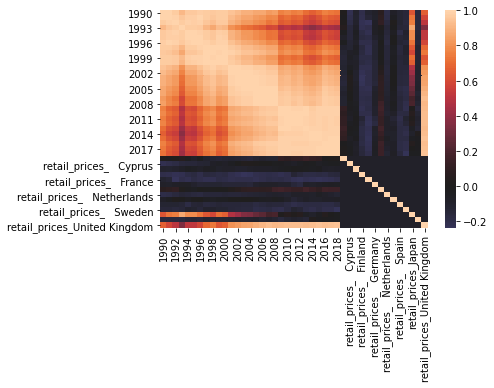

In [127]:
sns.heatmap(df.corr(), center = 0)

In [128]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [129]:
df['LogOfPrice'] = np.log(df['1990'])
# df.drop(["SalePrice"], axis=1, inplace=True)
df.dropna()

C:\Users\nagen\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,retail_prices_ Germany,retail_prices_ Italy,retail_prices_ Netherlands,retail_prices_ Portugal,retail_prices_ Spain,retail_prices_ Sweden,retail_prices_Japan,retail_prices_Norway,retail_prices_United Kingdom,LogOfPrice
0,0.268135,0.201965,0.259942,0.239905,0.177380,0.106201,0.183028,0.132619,0.094146,0.057165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.316266
1,0.000000,0.008734,0.054316,0.052257,0.063466,0.040627,0.075707,0.105437,0.144778,0.144088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-inf
2,0.126943,0.103712,0.143550,0.121932,0.166802,0.133999,0.132280,0.181219,0.169304,0.108066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.064017
3,0.019430,0.000000,0.014549,0.000000,0.026851,0.019957,0.000000,0.060956,0.050633,0.003915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.940934
4,0.116580,0.077511,0.000000,0.007126,0.000000,0.000000,0.006656,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.149175
5,0.150259,0.122271,0.163919,0.133017,0.144833,0.094797,0.079035,0.104613,0.099684,0.068128,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.895394
6,0.321244,0.316594,0.344326,0.209818,0.185517,0.143264,0.224626,0.221582,0.217563,0.204385,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.135556
7,0.025907,0.025109,0.079534,0.068092,0.069976,0.024234,0.035774,0.074959,0.070411,0.043853,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.653252
8,0.167098,0.169214,0.256062,0.184481,0.161107,0.181753,0.224626,0.187809,0.166139,0.164448,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.789172
9,0.102332,0.085153,0.115422,0.067300,0.029292,0.054170,0.079867,0.066722,0.066456,0.053250,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.279537


In [130]:
# X(Independent variables) and y(target variables) 
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [131]:
X

array([[ 2.01965065e-01,  2.59941804e-01,  2.39904988e-01,
         1.77379984e-01,  1.06200998e-01,  1.83028286e-01,
         1.32619440e-01,  9.41455696e-02,  5.71652310e-02,
         8.35654596e-02,  9.62512665e-02,  9.93184031e-02,
         9.36663693e-02,  8.10147299e-02,  8.50708924e-02,
         9.23913043e-02,  6.95296523e-02,  7.78032037e-02,
         2.75641026e-01,  2.54139073e-01,  2.81396911e-01,
         2.91884817e-01,  3.13333333e-01,  2.89458011e-01,
         2.74050633e-01,  1.82655411e-01,  2.07200588e-01,
         2.23614776e-01,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.31626576e+00],
       [ 8.73362448e-03,  5.43161979e-02,  5.22565321e-02,
         6.34662327e-02,  4.06272274e-02,  7.57071547e-02,
         1.05436573e-01,  1.44

In [132]:
y

array([0.26813471, 0.        , 0.12694301, 0.01943005, 0.11658031,
       0.15025907, 0.32124352, 0.02590674, 0.16709845, 0.10233161,
       0.07772021, 1.        , 0.96243523, 0.06217617])

In [133]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)
df.reset_index()

,index,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,retail_prices_ Germany,retail_prices_ Italy,retail_prices_ Netherlands,retail_prices_ Portugal,retail_prices_ Spain,retail_prices_ Sweden,retail_prices_Japan,retail_prices_Norway,retail_prices_United Kingdom,LogOfPrice
0,0,0.268135,0.201965,0.259942,0.239905,0.177380,0.106201,0.183028,0.132619,0.094146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.316266
1,1,0.000000,0.008734,0.054316,0.052257,0.063466,0.040627,0.075707,0.105437,0.144778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.968770
2,2,0.126943,0.103712,0.143550,0.121932,0.166802,0.133999,0.132280,0.181219,0.169304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.064017
3,3,0.019430,0.000000,0.014549,0.000000,0.026851,0.019957,0.000000,0.060956,0.050633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.940934
4,4,0.116580,0.077511,0.000000,0.007126,0.000000,0.000000,0.006656,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.149175
5,5,0.150259,0.122271,0.163919,0.133017,0.144833,0.094797,0.079035,0.104613,0.099684,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.895394
6,6,0.321244,0.316594,0.344326,0.209818,0.185517,0.143264,0.224626,0.221582,0.217563,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.135556
7,7,0.025907,0.025109,0.079534,0.068092,0.069976,0.024234,0.035774,0.074959,0.070411,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.653252
8,8,0.167098,0.169214,0.256062,0.184481,0.161107,0.181753,0.224626,0.187809,0.166139,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.789172
9,9,0.102332,0.085153,0.115422,0.067300,0.029292,0.054170,0.079867,0.066722,0.066456,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.279537


In [134]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [135]:

# # split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 3)
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [136]:
# np.where(X.values >= np.finfo(np.float64).max)

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

In [138]:
#multiple regression
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [139]:
#decision tree
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [140]:
#random forest
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [141]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  94
Decision tree  Regression Model Score is  92
Random Forest Regression Model Score is  56


,Model,Score,Explained Variance Score
0,Multiple Linear Regression,0.937739,0.913044
1,Decision Tree,0.919664,0.958362
2,Random forest Regression,0.558910,-0.521374
